In [1]:
import os

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import missingno as msno

In [ ]:
import sklearn as sk

In [ ]:
os.getcwd()

In [ ]:
os.chdir('..')

In [ ]:
path = os.path.join(os.getcwd(),'Datasets\\classified_data.csv')
path

In [ ]:
df = pd.read_csv(path,index_col=0)

In [ ]:
df

In [ ]:
msno.bar(df)

From the above visualization for the null values, we can see that there are no null values present.

In [ ]:
df.describe()

In [ ]:
sns.countplot(x='TARGET CLASS',data=df)

## K-Nearest Neighbors

The basic intution behind the K-Nearest Neighbors is that it assuems that all instances correspongd to points in the n-dimensional space. The nearest neighbors of an instance are defined in terms of the standard Eculidean distance.

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique. 


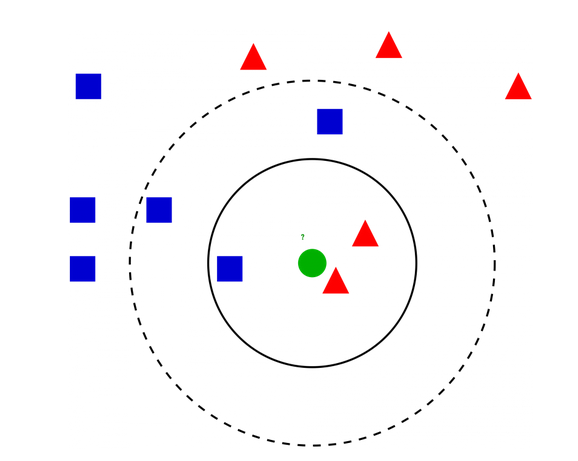

For example, in the above figure, if green symbol is for the instance to be predicted and blue and red symbols are the target classes. Then if we take 2 closest neighbors to green, then it will classify green as the red target class. But if we take 5 closest neighbors to green, then it wil classify green as the blue target class.

In [ ]:
X = df.drop(['TARGET CLASS'],axis=1)
y = df['TARGET CLASS']

#### Without Scaling the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Looking at the first nearest neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train) # We used "fit" to train our model on the input dat

In [ ]:
y_pred = knn.predict(X_test) # We used to "predict" to predict the labels of the new data

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

Now, interpreting the change in accuray and error_rate according to the chane in number of neighbors considered.

In [ ]:
error_rate = []
accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    accuracy.append(np.mean(pred_i == y_test))

In [ ]:
len(error_rate), len(accuracy)

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.lineplot(x=np.arange(1,40),y=accuracy,ci=False,
             marker='o',color='green',markersize=8,linestyle='--',ax=ax[0])
ax[0].set_title('Accuracy vs K Value')
ax[0].set_xlabel('K Neighbors')
ax[0].set_ylabel('Accuracy')
sns.lineplot(x=np.arange(1,40),y=error_rate,ci=False,
             marker='o',color='red',markersize=8,linestyle='--',ax=ax[1])
ax[1].set_title('Error Rate vs K Value')
ax[1].set_xlabel('K Neighbors')
ax[1].set_ylabel('Error Rate')

From the above lineplot, it can be seen that between the range of 30-35 neighbors we observe maximum accuracy and minimum error.

### Using Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=32)

Using cross validation  to check the performance of the model on the way the data is split. 

In [ ]:
cv_results = cross_val_score(knn,X_train,y_train,cv=10)
cv_results

In [ ]:
np.mean(cv_results)

In [ ]:
knn.get_params()

### Hyperparameter tuning using Scikit-Learn

- It helps us try a bunch of different hyperparameter values and select the best among them.
- It fits all of the hyperparameteres separarely and sees how well each performs and chooses the best parameter among all of the possible combinations and trains the model.

In [ ]:
from sklearn.model_selection import GridSearchCV

- auto: It decides the most appropriate algorithm based on the values passed to fit.
- metric: It defined the distance metric to be used.
- weights: It defines the weight function to be used in prediction.

In [ ]:
param_grid = {
    'n_neighbors': np.arange(1,41),
    'weights': ['uniform','distance'],
    'metric': ['euclidean','minkowski','manhattan'],
}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 10)
knn_cv.fit(X_train,y_train)

In [ ]:
knn_cv.best_params_

In [ ]:
knn_cv.best_score_

### Training a new K-Nearest Neighbor with the best parameters

In [ ]:
from sklearn.metrics import accuracy_score,roc_curve

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10,weights='uniform',metric='euclidean')
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

In [ ]:
knn.predict(X_test[:5])

Here, the predict function predicts the target class for the first 5 observations in the test set.

In [ ]:
knn.predict_proba(X_test[:5])

Here, the predict_proba predicts the probabilities for the each of the target class. For example for the first 5 observations in the test set the probabilites for the class 0 is greater than the probability of class 1.

In [ ]:
knn.predict_proba(X_test)[:,1]

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

In [ ]:
plt.figure(figsize=(15,8))
predictions_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='K-Nearest Neighbors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

The greater the area under the ROC curver, the better is the model.

In [ ]:
print(f'ROC-AUC score: {roc_auc_score(y_test,predictions_prob)}')

#### Computing the area under the curve using the cross-validation to see the performance of the model under different datasets.

In [ ]:
cv_scores = cross_val_score(knn, X_train,y_train,cv=5,scoring='roc_auc')
cv_scores

In [ ]:
np.mean(cv_scores)

### Using pipeline to scale the data and train a new model on the new data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
steps = [('scaler',StandardScaler()),
        ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {
    'knn__n_neighbors': np.arange(1,41),
    'knn__weights': ['uniform','distance'],
    'knn__metric': ['euclidean','minkowski','manhattan'],
}
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train,y_train)

In [ ]:
cv.best_score_

In [ ]:
cv.best_params_

In [ ]:
predictions = cv.predict(X_test)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

In [ ]:
cv.predict(X_test[:5])

In [ ]:
cv.predict_proba(X_test[:5])

In [ ]:
plt.figure(figsize=(15,8))
predictions_prob = cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='K-Nearest Neighbors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors ROC Curve')
plt.show()